In [103]:
import pandas as pd

In [104]:
df = pd.read_csv(r'C:\Users\anku3\span_email_nlp\data\spam.csv', encoding='latin1')

In [105]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [107]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [108]:
df.shape

(5572, 5)

In [109]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [110]:
df['text_length'] = df['v2'].apply(len)


In [111]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125


In [112]:
df.groupby('v1')['text_length'].mean()


v1
ham      71.023627
spam    138.866131
Name: text_length, dtype: float64

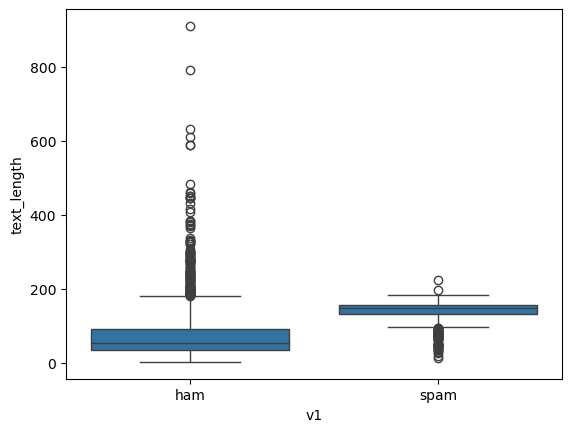

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='v1', y='text_length', data=df)
plt.show()


In [114]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [115]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    return " ".join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anku3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anku3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anku3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [117]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anku3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [118]:
df.loc[:, 'clean_message'] = df['message'].apply(preprocess_text)


C:\Users\anku3\AppData\Local\Temp\ipykernel_2524\1819538383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_message'] = df['message'].apply(preprocess_text)


In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [120]:
tfidf = TfidfVectorizer(
    max_features=3000,     # limit vocabulary size
    ngram_range=(1, 2)     # unigrams + bigrams
)

In [121]:
X = tfidf.fit_transform(df['clean_message'])

In [122]:
X.shape

(5572, 3000)

In [123]:
y = df['label'].map({'ham': 0, 'spam': 1})


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [125]:
import os
import joblib

MODEL_DIR = r"C:\Users\anku3\span_email_nlp\model"
os.makedirs(MODEL_DIR, exist_ok=True)
joblib.dump(tfidf, os.path.join(MODEL_DIR, "tfidf_vectorizer.pkl"))


['C:\\Users\\anku3\\span_email_nlp\\model\\tfidf_vectorizer.pkl']

In [126]:
os.listdir(MODEL_DIR)

['spam_classifier.pkl', 'tfidf_vectorizer.pkl']

In [127]:
from sklearn.naive_bayes import MultinomialNB


In [128]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [129]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_nb = nb_model.predict(X_test)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.82      0.90       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

[[965   1]
 [ 27 122]]


<Axes: >

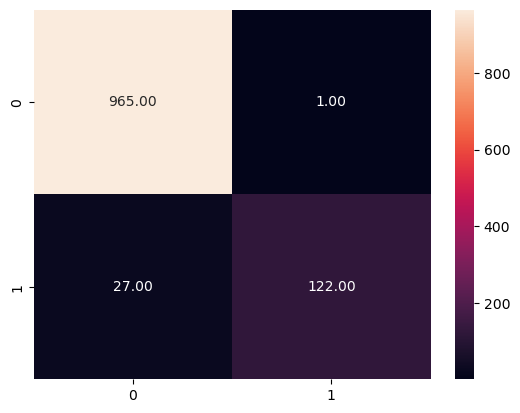

In [130]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm, annot= True, fmt= '.2f')

In [131]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, class_weight = 'balanced')
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [132]:
y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.91      0.92      0.91       149

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[952  14]
 [ 12 137]]


<Axes: >

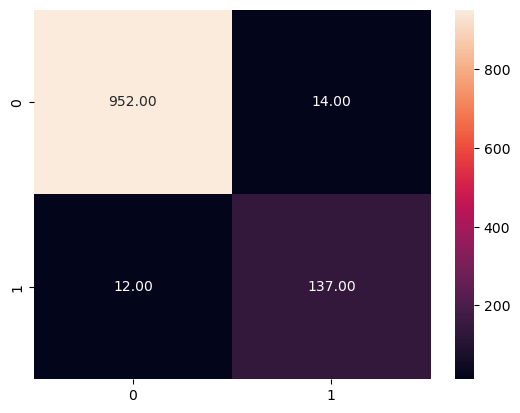

In [133]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot= True, fmt= '.2f')

In [134]:
joblib.dump(
    lr_model,
    r"C:\Users\anku3\span_email_nlp\model\spam_classifier.pkl"
)

['C:\\Users\\anku3\\span_email_nlp\\model\\spam_classifier.pkl']

In [135]:
y_proba = lr_model.predict_proba(X_test)[:, 1]  # probability of spam

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)


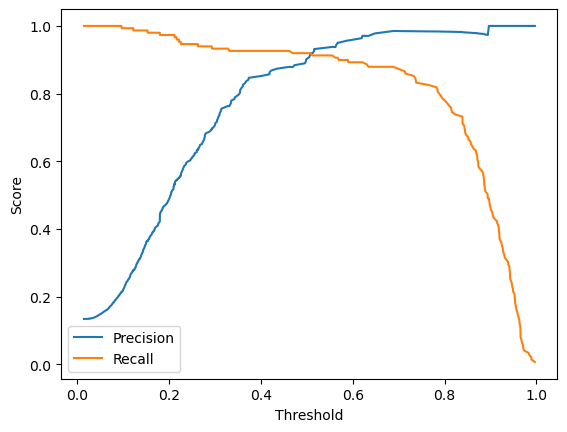

In [136]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()
